# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 12:25:27--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.1s   

2016-10-24 12:25:27 (45.4 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

First, rename the csv to a something shorter and look at the attribute names.  From this, it seems that there are multiple different types of keys within the table, which we will explore next.  The word count shows that there are 17556 rows of data, since the 17557 figure includes the header row.

In [2]:
!mv abq-food-inspections-fy2010.csv abq-2010.csv 
!csvcut -n abq-2010.csv
!cat abq-2010.csv | wc -l

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO
17557


Looking at the first 20 rows of data.  As the metadata suggests, most detailed level of data is facility inspection level.

In [3]:
!head -20 abq-2010.csv | csvcut -c8,9,10,11,12,13 | csvlook
!head -20 abq-2010.csv | csvcut -c14,15,16,17,18 | csvlook
!head -20 abq-2010.csv | csvcut -c19,20,21,22,23 | csvlook
!head -20 abq-2010.csv | csvcut -c24,25,26,27 | csvlook

|--------------------------+--------------------+---------------+-------------+-------------+-------------------|
|  OWNER_NAME              | NATURE_OF_BUSINESS | STREET_NUMBER | STREET_NAME | STREET_TYPE | POST_DIRECTIONAL  |
|--------------------------+--------------------+---------------+-------------+-------------+-------------------|
|  OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200         | GOLF COURSE | RD          | NW                |
|  OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200         | GOLF COURSE | RD          | NW                |
|  OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200         | GOLF COURSE | RD          | NW                |
|  OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200         | GOLF COURSE | RD          | NW                |
|  OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200         | GOLF COURSE | RD          | NW                |
|  2000 VIETMAN RESTAURANT | RESTAURANT         | 601           | SAN MATEO   | BLVD    

To get a better grasp of the dimensions of the table, let's look at one facility called Cake Fetish. I chose this particular bakery, because it provides a nice initial look at the dimensions.  As we can see below, each facility name can have multiple facility keys, with different associated location information and nature of business.  Facility names have the same program codes and and program categories.  Each facility key has multiple inspections.  Now we have a better idea of what the columns mean, and what we can expect when running csvstat. It is also worth noting that there are some null values for inspection memo and inpection type.  

In [4]:
!cat abq-2010.csv | csvcut -c1,2,3,4,5,6 | csvgrep -c1 -m "OOB CAKE FETISH" |csvlook
!cat abq-2010.csv | csvcut -c1,7,8,9,10,11| csvgrep -c1 -m "OOB CAKE FETISH"| csvlook
!cat abq-2010.csv | csvcut -c1,12,13,14| csvgrep -c1 -m "OOB CAKE FETISH"| csvlook
!cat abq-2010.csv | csvcut -c1,15,16,17,18| csvgrep -c1 -m "OOB CAKE FETISH"| csvlook
!cat abq-2010.csv | csvcut -c1,19,20,21,22| csvgrep -c1 -m "OOB CAKE FETISH"| csvlook
!cat abq-2010.csv | csvcut -c1,23,25,26,27| csvgrep -c1 -m "OOB CAKE FETISH"| csvlook


|------------------+--------------+-------------------------+-------------+-------+--------|
|  FACILITY_NAME   | FACILITY_KEY | SITE_ADDRESS            | CITY        | STATE | ZIP    |
|------------------+--------------+-------------------------+-------------+-------+--------|
|  OOB CAKE FETISH | 76851        | 2665 LOUISIANA BLVD NE  | ALBUQUERQUE | NM    | 87110  |
|  OOB CAKE FETISH | 76851        | 2665 LOUISIANA BLVD NE  | ALBUQUERQUE | NM    | 87110  |
|  OOB CAKE FETISH | 76851        | 2665 LOUISIANA BLVD NE  | ALBUQUERQUE | NM    | 87110  |
|  OOB CAKE FETISH | 82866        | 6200 COORS BLVD NW      | ALBUQUERQUE | NM    | 87120  |
|  OOB CAKE FETISH | 82866        | 6200 COORS BLVD NW      | ALBUQUERQUE | NM    | 87120  |
|  OOB CAKE FETISH | 82866        | 6200 COORS BLVD NW      | ALBUQUERQUE | NM    | 87120  |
|  OOB CAKE FETISH | 82866        | 6200 COORS BLVD NW      | ALBUQUERQUE | NM    | 87120  |
|------------------+--------------+-------------------------+---------

Next, look at the dataset using csvlook.

Below shows the summary statistics for the columns which provide some insight to the dimensions of the dataset and also the amount of different levels in each of the categorical attributes.  These columns include Facility Name,  Facility Key, Owner Name, Program Category Description, Inspection date, Inspection type, Inspection Description,  Action Description, Result Description, and Violation Description.  Most of the attribute names are intuitive, but this look is helpful to confirm what they represent.  Of these attributes, Program Category Description, Inspection Type, and Violation Description contain null values.  From this output, it seems that the entire Inspection Description column is null, which means it is useless to our analysis. There are 2615 unique Facility Names, but 2835 unique Facility Keys, which means that a Facility Name can have more than one key.  We will look at the details of this in a preceeding cell.  The most frequent facilities to get inspected are Smiths Food and Drug Centers, Inc., Isotopes Park - Ovations, Per EHSII Cecelia Garcia OOB La Reyna Del Sur, Isleta Amphitheater, and Echo Inc.  There are slighlty less levels for Owner Names, which we would expect.  Therefore Owners can own multiple facilities.  There are 24 different program categories, most of which are classified as "Food Service Establishment."  This dataset is from 2010, and is updated daily as per the metadata.  This particular set of restaurant inspections ranges from 7/1/2009 through 6/30/2010.  As per the inspection description types, there are 15 different types.  From the 5 most frequent, it is seen that some levels of this attribute are upper case and some are mixed case.  This is important to keep in mind when combining data and could present an issue going forward.  As expected, most inpsections are "Routine."  There are 8 unique values for Action Description.  Most are approved or ungraded.  A very small amount seem to be considered "Unsatisfactory."  The next column is Result Description.  The difference between this column and the action column is intuitive--one shows the results and one shows the action.  From the differences in counts, it is shown that more are found to be in compliance than actually are approved in result of the inspection. Also, more are deemed unsatisfactory than result in a "Downgrade" from the inspection. For the Violation Description column, there are 70 unique values.  Most violations are classified as "additional comments" which may not be greatly helpful in our analysis.


In [5]:
!cat abq-2010.csv | csvcut -c1,2,8,16,17,18,19,22,24,26 | csvstat

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ISLETA AMPHITHEATER:	68
		ECHO INC:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		32817:	68
		80949:	68
		91825:	66
  3. OWNER_NAME
	<class 'str'>
	Nulls: False
	Unique values: 1852
	5 most frequent values:
		APS:	792
		SMITHS FOOD AND DRUG CENTERS INC:	321
		CIRCLE K STORES INC:	277
		ALBERTSONS:	228
		WAL MART STORES EAST  LP:	156
	Max length: 82
  4. PROGRAM_CATEGORY_DESCRIPTION
	<class 'str'>
	Nulls: True
	Unique values: 24
	5 most frequent values:
		Food Service Establishment:	7969
		Retail -Grocery:	1159
		Retail - Self Service & Prepackage Foods:	894
		Ret

The statistics for the remaining fields are shown in the output below.   Columns which contain null values are site address, Nature of Business, address information, phone number, violation codes, and inspection memo.  Like Inspection Description, the entire Inspection Memo column is null, so it is useless in analysis. Other columns which are useless are City and State, since this is Albuquerque only data.  It seems that there is some sort of data issue with the state field anyway.  There are 48 different zip codes for the inspection locations in this dataset. There are 1892 unique owner values, which is slightly above the number of unique owner names.  Nature of Business category is similar to the Program Category Description, but has more levels.  We will look at this in a few cells.  Many of the facilities being inspected are located on Central Street.  None of the keys or codes have null values besides violation code. The levels generally match the corresponding descriptions.  Serial Number is a unique ID for inspection daily activity. It counts the number of inspections each Owner_ID taking into account if there are multiple inspections in one day.  It should be viewed at the Owner_ID and Inspection_Date level.

In [6]:
!cat abq-2010.csv | csvcut -c3,4,5,6,7,9,10,11,12,13,14,15,20,21,23,25,27 | csvstat

  1. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  2. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  3. STATE
	<class 'str'>
	Nulls: False
	Values: NM, 87
  4. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110:	1996
		87108:	1976
		87102:	1601
		87106:	1568
		87109:	1552
	Max length: 10
  5. OWNER_KEY
	<class 'int'>
	Nulls: False
	Min: 11
	Max: 87302
	Sum: 644760848
	Mean: 36725.953975848715
	Median: 33747.0
	Standard Deviation: 29428.207216739836
	Unique values: 1892
	5 most frequent values:
		1838:	792
		3537:	321
		1272:	228
		36280:	156
		80274:	155
  6. NATURE_OF_BUSINESS
	<class 'str'>
	Nulls: True
	Unique values: 594
	5 most frequent values:
		RESTAURANT:	4994
		FOOD SERVICE:	691
		GROCERY:	618
		BAR/RESTAURANT:	508
		APS SCHOOL FOOD SERVI

It seemed odd that there was the string "OOB" in some of the output we have seen thus far.  In grep-ing those facility names which contained this string, it is seen that in some cases, there are facility names including "OOB" and also ones without the string.  Additionally, there are cases when the same store has multiple Facility Names with a string of numbers attached. Therefore, when aggregating data, the Facility Name column may not be the most reliable.  It is better to use Owner Name or Facility Key, or a 'LIKE' when querying  in SQL.

In [8]:
!cat abq-2010.csv | csvcut -c1,2,8 | csvgrep -c1 -m "DOLLAR TREE" | csvsort -c1 | uniq -c | csvlook
!cat abq-2010.csv | csvcut -c1,2,8| csvgrep -c1 -m "7 ELEVEN" |  csvsort -c1 | uniq -c | csvlook


|--------------------------------+--------------+-------------------------|
|        1 FACILITY_NAME         | FACILITY_KEY | OWNER_NAME              |
|--------------------------------+--------------+-------------------------|
|        1 DOLLAR TREE 2653      | 93470        | DOLLAR TREE STORES INC  |
|        4 DOLLAR TREE 2654      | 33072        | DOLLAR TREE STORES INC  |
|        5 DOLLAR TREE 2661      | 81403        | DOLLAR TREE STORES INC  |
|        5 DOLLAR TREE 2664      | 33074        | DOLLAR TREE STORES INC  |
|        6 DOLLAR TREE 2689      | 52031        | DOLLAR TREE STORES INC  |
|        5 DOLLAR TREE 2745      | 52146        | DOLLAR TREE STORES INC  |
|        5 DOLLAR TREE 2851      | 55339        | DOLLAR TREE STORES INC  |
|        6 DOLLAR TREE 2967      | 58026        | DOLLAR TREE STORES INC  |
|        5 DOLLAR TREE 3702      | 76579        | DOLLAR TREE STORES INC  |
|        4 DOLLAR TREE 3800      | 80529        | DOLLAR TREE STORES INC  |
|        5 D

Below is an output of all of the different program category descriptions.  It would be interesting to compare the inspection results and action of schools versus Food Service, Retail, and Bars. To expose one more potential data issue, I also showed unique values for the seemingly similar "Nature of Business."  It seems that this attribute may be another situation to use "like" since it looks like there are many different entries foor similar businesses.  An example is shown in the output for different ways to describe hot dog distributors.

In [9]:
!echo "Unique Program Categories:"
!cat abq-2010.csv | csvcut -c16| csvsort -c1 | uniq -c | sort -rn
!echo "\nRedundancy in Nature of Business Category:"
!cat abq-2010.csv | csvcut -c9| csvsort -c1 | uniq -c | sort -rn | grep "HOT DOG"

Unique Program Categories:
   7969 Food Service Establishment
   1159 Retail -Grocery
    894 Retail - Self Service & Prepackage Foods
    865 Retail - Prepackage Only
    832 School
    832 Bar
    748 Childcare
    515 Mobile Pre-Packaged
    489 Food Processor
    357 Institutional Kitchen
    343 Bakery
    341 Mobile Food Unit
    339 Retail - Deli
    319 Non School
    294 Retail - Meat/Seafood
    288 Limited Menu
    203 Warehouse
    203 Seasonal Venue -Fixed Location
    121 Meat Market
    113 Retail - Specialty Food Permit
     90 Frozen Food Truck
     73 NOT FOR PROFIT KITCHEN PERMIT
     67 Seasonal Location -Food Service Permit
      6 Food/Drink Vending - Up to 15 Units
      1 PROGRAM_CATEGORY_DESCRIPTION

Redundancy in Nature of Business Category:
     14 HOT DOG CART
     12 HOT DOGS
      3 HOT DOG STAND
      1 HOT DOG VENDOR
      1 HOT DOG MOBILE CART


## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

Connect to the database and sign into PostgreSQL

In [10]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [11]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [12]:
!createdb -U dbuser week7

createdb: database creation failed: ERROR:  database "week7" already exists


In [13]:
%sql postgresql://dbuser@localhost:5432/week7

'Connected: dbuser@week7'

Create a shell table in database.  Drop exisiting table if it already exists for reproducibility purposes.  If you rerun the code after making the table, you will not be able to overwrite the existing table.  Signify the max number of characters in each column to be uploaded into the table.  I excluded some of the columns which will not be useful in analysis.  These columns were city and state which were all the same, street number since this doesn't tell us much, and inspection type and inspection memo which were null.

In [14]:
%%sql
DROP TABLE IF EXISTS inspection;
CREATE TABLE inspection (
    FACILITY_NAME CHAR(80),
    FACILITY_KEY VARCHAR(6),
    SITE_ADDRESS CHAR(35),
    ZIP VARCHAR(10),
    OWNER_KEY VARCHAR(5),
    OWNER_NAME CHAR(86),
    NATURE_OF_BUSINESS CHAR(25),
    STREET_NAME CHAR(24),
    STREET_TYPE CHAR(4),
    POST_DIRECTIONAL CHAR(2),
    PHONE VARCHAR(15),
    PROGRAM_CATEGORY VARCHAR(4),
    PROGRAM_CATEGORY_DESCRIPTION VARCHAR(40),
    INSPECTION_DATE TIMESTAMP,
    INSPECTION_DESC CHAR(32),
    SERIAL_NUM VARCHAR(9),
    ACTION_CODE VARCHAR(2),
    ACTION_DESC CHAR(34),
    RESULT_CODE VARCHAR(2),
    RESULT_DESC CHAR(37),
    VIOLATION_CODE VARCHAR(64),
    VIOLATION_DESC CHAR(50)
    )



Done.
Done.


[]

Create a csv file with columns denoted above called sqldata.csv

In [15]:
!cat abq-2010.csv | csvcut -c1,2,3,6,7,8,9,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26 > sqldata.csv

Print working directory, which will need to be subbed into the next cell in order to point to the datafile which contains the data we want to upload into the database.

In [16]:
!pwd

/home/jovyan/work


Use working directory from the cell above, paste 'pwd/sqldata.csv' after FROM below.  This code copies the data from the sqldata.csv file into the blank shell table that we created in the database.  The other fields show tell SQL that we are uploading a csv delimited by commas and that the dataframe has a header.  The output from the copy statement and the count(\*) command following tells us that all of the rows were successfully uploaded (17556).

In [17]:
%%sql
COPY inspection 
FROM '/home/jovyan/work/sqldata.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

In [18]:
%%sql
select count(*) from inspection;

1 rows affected.


count
17556


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

First, look at the number of inspections by region to determine the locations which have the most inspections.  It seems from the output that the NE has the most frequency in inspections.  Serial_Num is used to count the distinct amount of inspections because this is the unique ID for daily inspection activity.

In [19]:
%%sql
SELECT 
    POST_DIRECTIONAL,
    COUNT(DISTINCT SERIAL_NUM) AS INSPECTIONS
FROM INSPECTION
WHERE POST_DIRECTIONAL NOT IN ('N','None')
GROUP BY 1
order by 2 desc;

4 rows affected.


post_directional,inspections
NE,4518
NW,2213
SE,1452
SW,766


The next step uses a case statement to generalize the type of establishment to School, Retail, Restaurant, Bar and Other, since this is what we will be basing the analysis on.  The code uses a substring since the Program_Category_Descriptions were in a format similar which had both the name Retail and its subcategory (ex. 'Retail - Grocery').  From the output, it is shown that most of the Retaurants, Schools, Bars and Retail establishments inspected are in NE and NW, and there are no distributional discrepancies for these categories.  There are more restaurants and retail stores versus schools and bars in all of the categories.

In [20]:
%%sql
SELECT 
    POST_DIRECTIONAL,
    CASE 
        WHEN PROGRAM_CATEGORY_DESCRIPTION IN ('School') then 'School'
        WHEN SUBSTRING(PROGRAM_CATEGORY_DESCRIPTION,1,6) IN ('Retail') then 'Retail'
        WHEN PROGRAM_CATEGORY_DESCRIPTION IN ('Food Service Establishment') then 'Restaurant'
        WHEN PROGRAM_CATEGORY_DESCRIPTION IN ('Bar') then 'Bar'
        ELSE 'Other' end as TYPE,  
    COUNT(DISTINCT SERIAL_NUM) AS INSPECTIONS
FROM INSPECTION
WHERE POST_DIRECTIONAL NOT IN ('N','None') 
GROUP BY 1,2
order by 1,3 desc;

20 rows affected.


post_directional,type,inspections
NE,Restaurant,2045
NE,Other,1047
NE,Retail,939
NE,Bar,254
NE,School,233
NW,Restaurant,1009
NW,Retail,504
NW,Other,455
NW,School,138
NW,Bar,107


Now, let's look at the cases for which inspections resulted in compliance.  In the following code, there are two subqueries on the inspection table.  The left table takes the Post Directional, creates a new variable which categorizes result code was "In Compliance" or not, and then counts the distinct inspections for both In Compliance and Other Categories.  The other table counts the total number of inspections for each post Directional.  The two tables are joined together on Post Directional and filtered to only "In Compliance."  A calculated field divides Inspections resulting "In Compliance" over total inspections for each Post Direction, which provides the ratio of compliant results compared to total.  The result shows that the mid-sized inspection Post Directions (SE, NW) are most compliant.  This could mean that establishments are trying to build their competitive edge and expand into busier areas, so they are more aware of health codes and worried about their reputations.

In [22]:
%%sql
SELECT 
    A.POST_DIRECTIONAL,
    A.INSPECTIONS/CAST(B.DIR_INSPECTIONS AS FLOAT) AS COMPLIANCE_RATIO,
    B.DIR_INSPECTIONS as Total_Inspections
FROM (SELECT 
            POST_DIRECTIONAL,
            CASE 
              WHEN RESULT_DESC != 'IN COMPLIANCE' THEN 'OTHER'
              ELSE RESULT_DESC END AS COMPLIANCE, 
            COUNT(DISTINCT SERIAL_NUM) AS INSPECTIONS
        FROM INSPECTION
        WHERE POST_DIRECTIONAL NOT IN ('N','None')
        GROUP BY 1,2) AS A
LEFT JOIN (SELECT 
                POST_DIRECTIONAL,
                COUNT(DISTINCT SERIAL_NUM) AS DIR_INSPECTIONS
            FROM INSPECTION
            WHERE POST_DIRECTIONAL NOT IN ('N','None')
            GROUP BY 1) AS B
ON A.POST_DIRECTIONAL = B.POST_DIRECTIONAL 
WHERE A.COMPLIANCE = 'IN COMPLIANCE' 
ORDER BY 3
;

4 rows affected.


post_directional,compliance_ratio,total_inspections
SW,0.650130548302872,766
SE,0.696280991735537,1452
NW,0.698599186624492,2213
NE,0.67950420540062,4518


The next set of queries creates a new data table called 'PROGRAM' which pulls relevant fields and extracts date parts from the Inspection Date timestamp.  This will be used to analyze the violation rates by program and month.

In [23]:
%%sql
DROP TABLE IF EXISTS PROGRAM;
CREATE TABLE PROGRAM AS SELECT
    PROGRAM_CATEGORY,
    PROGRAM_CATEGORY_DESCRIPTION,
    OWNER_NAME,
    TO_CHAR(INSPECTION_DATE, 'YYYY') AS year,
    TO_CHAR(INSPECTION_DATE, 'MM') AS month,
    TO_CHAR(INSPECTION_DATE, 'DD') AS day,
    TO_CHAR(INSPECTION_DATE, 'Day') AS day_of_week_str,
    TO_CHAR(INSPECTION_DATE, 'D') AS day_of_week,
    ACTION_DESC,
    RESULT_DESC,
    VIOLATION_DESC,
    SERIAL_NUM 
FROM INSPECTION
ORDER BY 1, 2, 3, INSPECTION_DATE DESC;
SELECT * FROM PROGRAM LIMIT 200;

Done.
17556 rows affected.
200 rows affected.


program_category,program_category_description,owner_name,year,month,day,day_of_week_str,day_of_week,action_desc,result_desc,violation_desc,serial_num
0402,Childcare,1ST CLASS LEARNING CENTER,2010,01,21,Thursday,5,APPROVED,IN COMPLIANCE,Food unprotected,DA8009745
0402,Childcare,1ST CLASS LEARNING CENTER,2010,01,21,Thursday,5,APPROVED,IN COMPLIANCE,Food improperly labeled,DA8009745
0402,Childcare,1ST CLASS LEARNING CENTER,2010,01,21,Thursday,5,APPROVED,IN COMPLIANCE,Additional Comments,DA8009745
0402,Childcare,1ST CLASS LEARNING CENTER,2009,08,18,Tuesday,3,APPROVED,IN COMPLIANCE,No Violations Found,DA8008474
0402,Childcare,1ST CLASS LEARNING CENTER,2009,08,18,Tuesday,3,APPROVED,IN COMPLIANCE,Additional Comments,DA8008474
0402,Childcare,ABEJA ACADEMY,2010,06,10,Thursday,5,APPROVED,IN COMPLIANCE,None,DA0045022
0402,Childcare,ACADEMIC ANGELS LLC,2010,03,02,Tuesday,3,NON-GRADED,NOT APPLICABLE,Additional Comments,DA7757849
0402,Childcare,ACADEMIC ANGELS LLC,2010,03,02,Tuesday,3,APPROVED,IN COMPLIANCE,Cold Holding,DA7757847
0402,Childcare,ACADEMIC ANGELS LLC,2010,03,02,Tuesday,3,NON-GRADED,NOT APPLICABLE,Additional Comments,DA7757857
0402,Childcare,ACADEMIC ANGELS LLC,2010,03,02,Tuesday,3,APPROVED,IN COMPLIANCE,Additional Comments,DA7757847


Violation Description will be used to create a binary violation category field.  In the categories below, it seems that there are a few different descriptions which would indicate there was no violation for a particular inspection.  Also, recall that there are null values for this field, so we will assume that these are not classified as violations as well.

In [24]:
%%sql
select distinct VIOLATION_DESC from PROGRAM;

71 rows affected.


violation_desc
None
Potentially hazardous food improperly thawed
Additional Comments
Plumbing: Improperly installed/maintained/supplied
Other Operations - Linen
Food contact surfaces
Unapproved container
Non-Food contact surfaces
Improper handwashing
LACK OF REFIGERATIONS


Using information from the previous table, create a table to show establishment type, violation ratio, and count of inspections.  The subquery pulls from the PROGRAM table.  It selects distinct serial_nums for each Program_Category_Descpriptions (grouped similarly to how we handled previously) and also creates the violation binary counter.  This will take a value of 1 for all violations which are not null, or not coded as 'Additional Comments,''No Violations Found,''Delivered Informational Brochure,' or 'None.'  We assume the rest are not considered violations.  From this output, it seems that schools have the lowest violation ratios, whereas restaurants have the highest.  This would be expected.

In [25]:
%%sql
SELECT 
    TYPE,
    SUM(VIOLATION_COUNT)/CAST(COUNT(DISTINCT SERIAL_NUM) AS FLOAT) AS VIOLATION_RATIO,
    COUNT(DISTINCT SERIAL_NUM)
FROM (SELECT DISTINCT
            CASE 
                WHEN PROGRAM_CATEGORY_DESCRIPTION IN ('School') then 'School'
                WHEN SUBSTRING(PROGRAM_CATEGORY_DESCRIPTION,1,6) IN ('Retail') then 'Retail'
                WHEN PROGRAM_CATEGORY_DESCRIPTION IN ('Food Service Establishment') then 'Restaurant'
                WHEN PROGRAM_CATEGORY_DESCRIPTION IN ('Bar') then 'Bar'
                ELSE 'Other' end as TYPE,    
            SERIAL_NUM,
            CASE 
              WHEN VIOLATION_DESC IN ('Additional Comments','No Violations Found','Delivered Informational Brochure', 'None') THEN 0
              WHEN VIOLATION_DESC IS NULL THEN 0
              ELSE 1 END AS VIOLATION_COUNT
        FROM PROGRAM
        ) as a
WHERE TYPE != 'Other'
GROUP BY 1
ORDER BY 1
;


4 rows affected.


type,violation_ratio,count
Bar,0.240534521158129,449
Restaurant,0.304055799535004,3871
Retail,0.23936170212766,1880
School,0.186046511627907,473


Using same logic as before, let's add month to our analysis.  From the output, it seems that there is some seasonality in the data for both number of inspections and violation ratio.

In [26]:
%%sql
SELECT 
    TYPE,
    month,
    SUM(VIOLATION_COUNT)/CAST(COUNT(DISTINCT SERIAL_NUM) AS FLOAT) AS VIOLATION_RATIO,
    COUNT(DISTINCT SERIAL_NUM)
FROM (SELECT DISTINCT
            CASE 
                WHEN PROGRAM_CATEGORY_DESCRIPTION IN ('School') then 'School'
                WHEN SUBSTRING(PROGRAM_CATEGORY_DESCRIPTION,1,6) IN ('Retail') then 'Retail'
                WHEN PROGRAM_CATEGORY_DESCRIPTION IN ('Food Service Establishment') then 'Restaurant'
                WHEN PROGRAM_CATEGORY_DESCRIPTION IN ('Bar') then 'Bar'
                ELSE 'Other' end as TYPE,  
            month,  
            SERIAL_NUM,
            CASE 
              WHEN VIOLATION_DESC IN ('Additional Comments','No Violations Found','Delivered Informational Brochure', 'None') THEN 0
              WHEN VIOLATION_DESC IS NULL THEN 0
              ELSE 1 END AS VIOLATION_COUNT
        FROM PROGRAM
        ) as a
WHERE TYPE != 'Other'
GROUP BY 1,2
ORDER BY 1,2
;

45 rows affected.


type,month,violation_ratio,count
Bar,01,0.4,15
Bar,02,0.214285714285714,14
Bar,03,0.16,25
Bar,04,0.16,25
Bar,05,0.0,9
Bar,06,0.0,4
Bar,07,0.306122448979592,49
Bar,08,0.340425531914894,47
Bar,09,0.348484848484849,66
Bar,10,0.272727272727273,66


Let's look more closely at Schools and Restaurants. It seems from the output that there are more inspections for restaurants in the end of the year and also that there are less violations found during these months.  For schools, the bulk of the inpections are completed at the beginning of the school year (August, September, October) and in the beginning of the New Year (January, February).  During these months, violation rates are considerably low compared to that of restaurants.  Therefore, Restaurants have a more consistent inspection schedule and a higher overall violation rate.  As the amount of inspections increase, it seems that Restaurants perform better violation wise.  Schools have a more seasonal pattern in inspections, and a low rate of violatons.  This may be because that most of the schools have the same or similar owner. Therefore, if they are doing something well in one school, it is likely they are also doing it in another school as well.  It is also worth noting that there seems that there are no inspections in schools in December.

In [28]:
%%sql
SELECT 
    TYPE ||'_'|| month as Type_Month,
    SUM(VIOLATION_COUNT)/CAST(COUNT(DISTINCT SERIAL_NUM) AS FLOAT) AS VIOLATION_RATIO,
    COUNT(DISTINCT SERIAL_NUM)
FROM (SELECT DISTINCT
            CASE 
                WHEN PROGRAM_CATEGORY_DESCRIPTION IN ('School') then 'School'
                WHEN SUBSTRING(PROGRAM_CATEGORY_DESCRIPTION,1,6) IN ('Retail') then 'Retail'
                WHEN PROGRAM_CATEGORY_DESCRIPTION IN ('Food Service Establishment') then 'Restaurant'
                WHEN PROGRAM_CATEGORY_DESCRIPTION IN ('Bar') then 'Bar'
                ELSE 'Other' end as TYPE,  
            month,  
            SERIAL_NUM,
            CASE 
              WHEN VIOLATION_DESC IN ('Additional Comments','No Violations Found','Delivered Informational Brochure', 'None') THEN 0
              WHEN VIOLATION_DESC IS NULL THEN 0
              ELSE 1 END AS VIOLATION_COUNT
        FROM PROGRAM
        ORDER BY 1,2
        ) as a
WHERE TYPE != 'Other'
and TYPE in ('School', 'Restaurant')
GROUP BY 1
;

21 rows affected.


type_month,violation_ratio,count
Restaurant_01,0.353159851301115,269
Restaurant_02,0.422222222222222,225
Restaurant_03,0.396396396396396,333
Restaurant_04,0.437699680511182,313
Restaurant_05,0.403100775193798,129
Restaurant_06,0.398373983739837,123
Restaurant_07,0.355072463768116,276
Restaurant_08,0.345762711864407,295
Restaurant_09,0.182222222222222,450
Restaurant_10,0.230443974630021,473


Below, we can look at the results graphically, which show seasonality and enforce the observations listed above.  I couldn't format the legend on the plot correctly, so I apologize that it is somewhat unsightly.

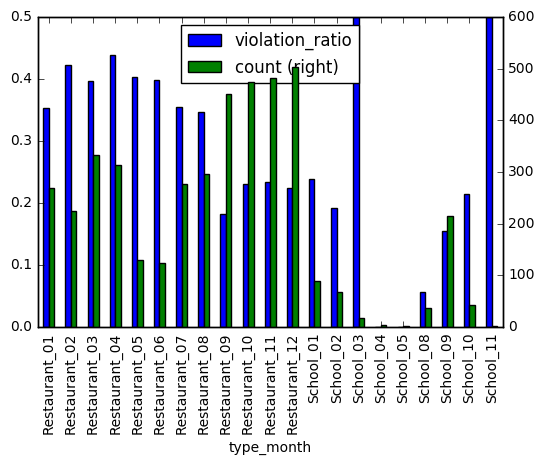

In [29]:
import matplotlib as plt
df = _.DataFrame()
df.plot(x='type_month', secondary_y='count', kind = 'bar')

## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table